<a href="https://colab.research.google.com/github/Rafael-Ernesto-Perez/ciencia-de-datos/blob/main/PDI(imagenes_practicas).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Técnicas de procesamiento de imágenes
En el procesamiento de imágenes, un problema común es el desequilibrio de clases, que se soluciona aumentando la clase minoritaria con técnicas como rotaciones, volteos o zoom. Para mejorar la generalización del modelo, se aplican técnicas de aumentación aleatoria a todo el conjunto de datos. La nitidez se mejora con filtros pasa alto y realce de bordes, mientras que el ruido se reduce con filtros de suavizado como el gaussiano o de mediana. Las correcciones geométricas alinean imágenes desalineadas, y los ajustes de brillo y contraste ayudan a corregir la variabilidad en la iluminación.
Podemos proponer un pipeline para realizar este tratamiento:

### 1- Limpieza y corrección de Píxeles
- **Detección de píxeles defectuosos**: Identificación de píxeles con valores atípicos o afectados por ruido (como píxeles "muertos" o "calientes").
- **Reemplazo e Interpolación**: Corrección de estos píxeles mediante interpolación basada en sus vecinos o el uso de filtros específicos (como la mediana).

### 2- Resaltado de objetos de interés y eliminación de artefactos No deseados
- **Reducción de ruido**: Aplicar filtros como el **filtro Gaussiano** o **filtro de mediana** para suavizar la imagen y eliminar el ruido.
- **Morfología Matemática**: Operaciones como **dilatación**, **erosión**, **apertura** y **cierre** permiten refinar la imagen, eliminando artefactos y mejorando la segmentación de los objetos de interés.

### 3- Aumentación de datos
- **Transformaciones geométricas**: Aplicación de rotaciones, traslaciones y zooms para aumentar la cantidad de ejemplos a partir de una imagen.
- **Alteraciones de intensidad**: Modificar características como el brillo, el contraste o añadir ruido gaussiano para simular diferentes condiciones de captura.
- **Creación de imágenes sintéticas**: Generar nuevas imágenes mediante el uso de técnicas como aumentación de datos o redes generativas adversariales (GANs).



# 1: Limpieza - Correción


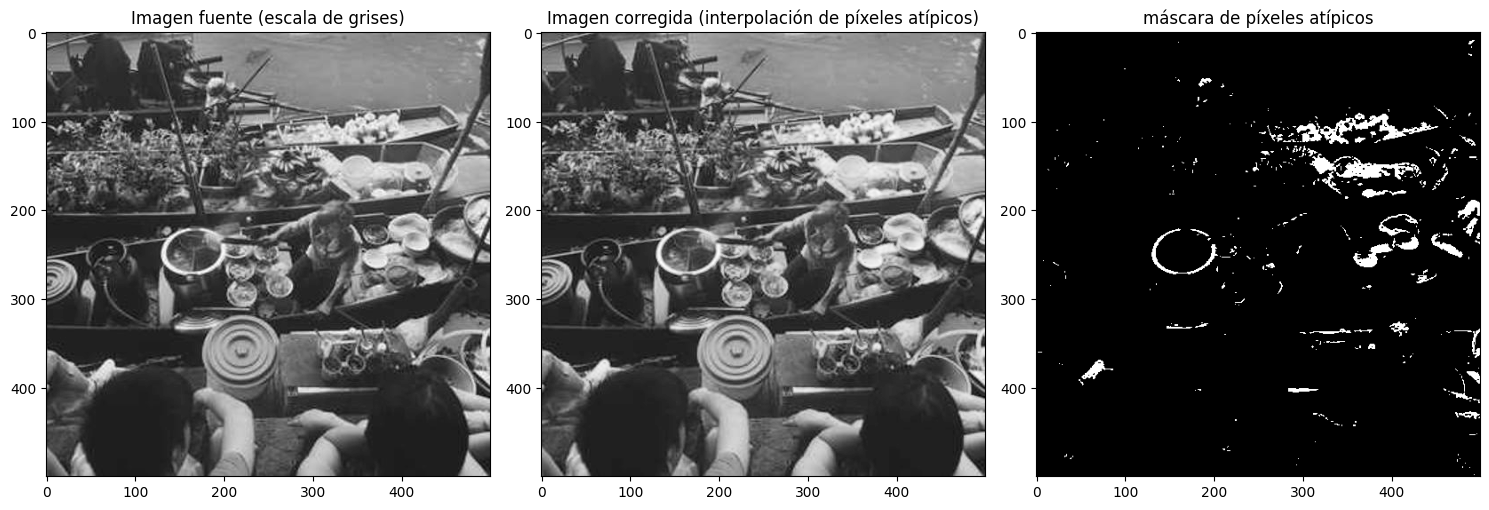

In [ ]:
#@title 1) Limpieza correcion de pixeles
import requests
from PIL import Image
from io import BytesIO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# URL de una imagen aleatoria de Lorem Picsum (puedes cambiar el tamaño)
url = "https://picsum.photos/500/500"
response = requests.get(url)

# si fue exitosa
if response.status_code == 200:
    image = Image.open(BytesIO(response.content)).convert('L')  # Convertir a escala de grises
    gray_image = np.array(image)

    # Paso 1: Detección de píxeles defectuosos usando media y desviación estándar
    mean_value = np.mean(gray_image)
    std_value = np.std(gray_image)

    # Definir un rango de píxeles considerados "normales"
    lower_bound = mean_value - 2 * std_value
    upper_bound = mean_value + 2 * std_value

    # Crear una máscara que identifique los píxeles fuera del rango
    bad_pixels_mask = (gray_image < lower_bound) | (gray_image > upper_bound)

    # Paso 2: Interpolación de los píxeles malos utilizando vecinos (media de los vecinos)
    corrected_image = gray_image.copy()

    def interpolate_pixel(image, x, y):
        # Seleccionamos una ventana 3x3 alrededor del píxel
        neighbors = image[max(0, x-1):x+2, max(0, y-1):y+2]
        # Reemplazamos el píxel defectuoso por la media de sus vecinos
        return np.mean(neighbors)

    # Aplicamos la interpolación a los píxeles fuera del rango
    for i in range(gray_image.shape[0]):
        for j in range(gray_image.shape[1]):
            if bad_pixels_mask[i, j]:
                corrected_image[i, j] = interpolate_pixel(gray_image, i, j)

    # Paso 3: Mostrar la imagen fuente, la corregida, y la máscara de píxeles defectuosos
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # Imagen fuente en escala de grises
    axs[0].imshow(gray_image, cmap='gray')
    axs[0].set_title("Imagen fuente (escala de grises)")

    # Imagen corregida
    axs[1].imshow(corrected_image, cmap='gray')
    axs[1].set_title("Imagen corregida (interpolación de píxeles atípicos)")

    # Máscara de píxeles atípicos
    axs[2].imshow(bad_pixels_mask, cmap='gray')
    axs[2].set_title("máscara de píxeles atípicos")

    plt.tight_layout()
    plt.show()
else:
    print(f"Error al cargar la imagen {response.status_code}")

# 2: Selección de características



#### 2.1 Filtro Gaussiano

**Descripción:**
El filtro Gaussiano se utiliza para suavizar la imagen y reducir el ruido. Funciona aplicando una función Gaussiana, que es una campana que suaviza los valores de los píxeles cercanos, a la imagen.

**Ventajas:**
- Reduce el ruido en la imagen.
- Suaviza la imagen de manera uniforme, preservando algunos detalles de los bordes.



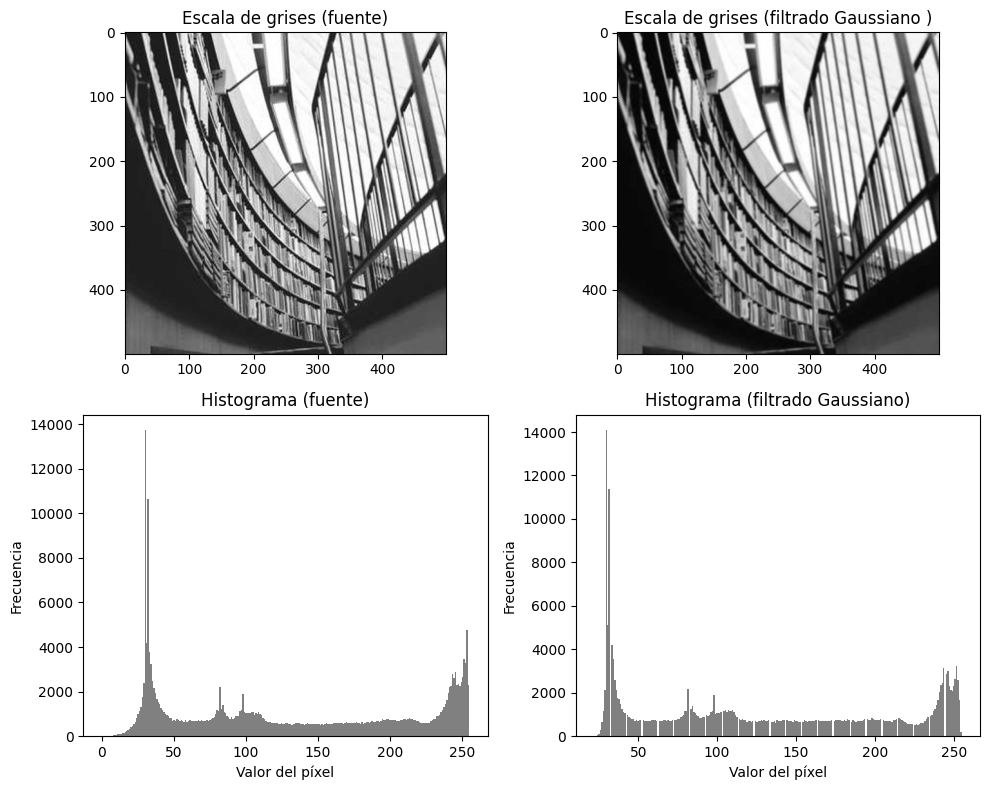

In [ ]:
#@title filtrado gaussian

import requests
from PIL import Image
from io import BytesIO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# URL de una imagen aleatoria de Lorem Picsum (puedes cambiar el tamaño)
url = "https://picsum.photos/500/500"
response = requests.get(url)

if response.status_code == 200:
    image = Image.open(BytesIO(response.content)).convert('L')  # Convertir a escala de grises
    gray_image = np.array(image)  # Convertir la imagen a un array numpy

    # Aplicar filtro Gaussiano para eliminación de ruido
    def apply_gaussian_filter(image):
        return cv2.GaussianBlur(image, (5, 5), 0)

    filtered_gray_image = apply_gaussian_filter(gray_image)

    def plot_histogram(image, ax, title):
        ax.hist(image.ravel(), bins=256, color='gray')
        ax.set_title(title)
        ax.set_xlabel('Valor del píxel')
        ax.set_ylabel('Frecuencia')

    # Visualización de la imagen fuente, filtrada y los histogramas
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))

    # Imagen fuente en escala de grises
    axs[0, 0].imshow(gray_image, cmap='gray')
    axs[0, 0].set_title("Escala de grises (fuente)")

    # Imagen filtrada
    axs[0, 1].imshow(filtered_gray_image, cmap='gray')
    axs[0, 1].set_title("Escala de grises (filtrado Gaussiano )")

    # Histogramas de la imagen fuente y filtrada
    plot_histogram(gray_image, axs[1, 0], "Histograma (fuente)")
    plot_histogram(filtered_gray_image, axs[1, 1], "Histograma (filtrado Gaussiano)")

    plt.tight_layout()
    plt.show()
else:
    print(f"Error al cargar la imagen {response.status_code}")


#### 2.2 Filtro Mediana
**Descripción:**
El filtro Mediana reemplaza cada píxel por la mediana de los píxeles vecinos. Es especialmente eficaz para eliminar el ruido de tipo "sal y pimienta" (píxeles blancos y negros dispersos).

**Ventajas:**
- Muy efectivo para eliminar el ruido de "sal y pimienta".
- Mantiene los bordes de la imagen mejor que un filtro promedio.




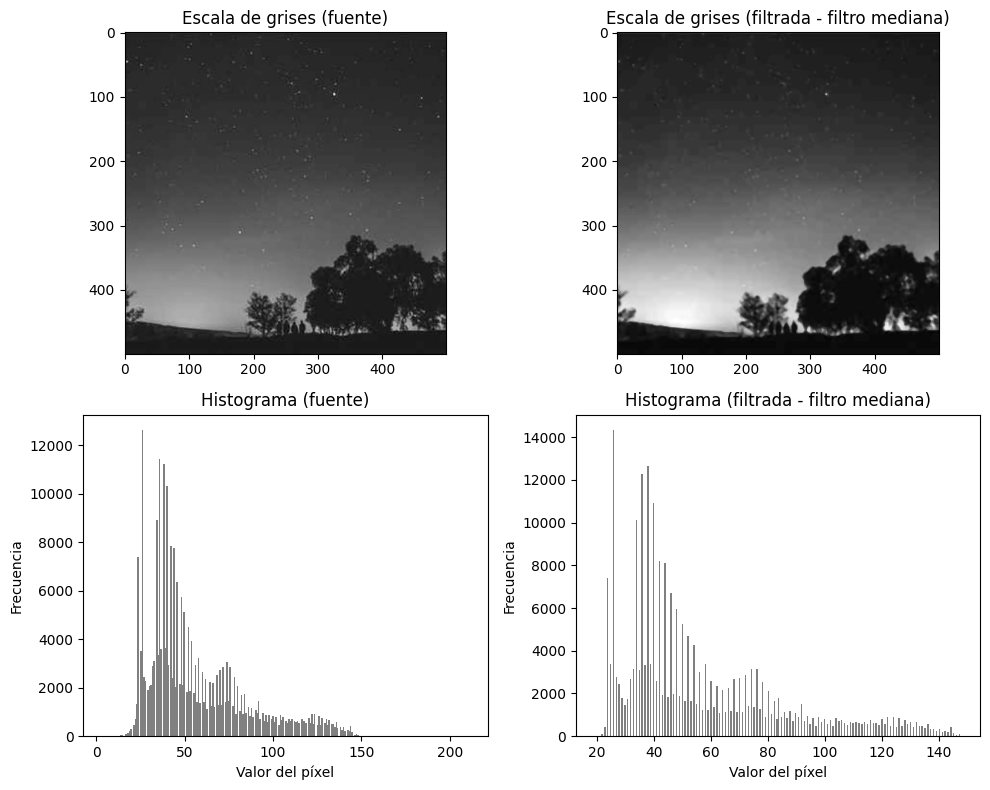

In [ ]:
#@title Filtro Mediana

import requests
from PIL import Image
from io import BytesIO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# URL de una imagen aleatoria de Lorem Picsum (puedes cambiar el tamaño)
url = "https://picsum.photos/500/500"
response = requests.get(url)

if response.status_code == 200:
    image = Image.open(BytesIO(response.content)).convert('L')  # Convertir a escala de grises
    gray_image = np.array(image)

    # Aplicar filtro de Mediana para eliminación de ruido impulsivo
    def apply_median_filter(image):
        return cv2.medianBlur(image, 5)  # El tamaño del kernel es 5x5

    filtered_gray_image = apply_median_filter(gray_image)

    # Función para dibujar el histograma
    def plot_histogram(image, ax, title):
        ax.hist(image.ravel(), bins=256, color='gray')
        ax.set_title(title)
        ax.set_xlabel('Valor del píxel')
        ax.set_ylabel('Frecuencia')

    # Visualización de la imagen fuente, filtrada y los histogramas
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))

    # Imagen fuente en escala de grises
    axs[0, 0].imshow(gray_image, cmap='gray')
    axs[0, 0].set_title("Escala de grises (fuente)")

    # Imagen filtrada
    axs[0, 1].imshow(filtered_gray_image, cmap='gray')
    axs[0, 1].set_title("Escala de grises (filtrada - filtro mediana)")

    # Histogramas de la imagen fuente y filtrada
    plot_histogram(gray_image, axs[1, 0], "Histograma (fuente)")
    plot_histogram(filtered_gray_image, axs[1, 1], "Histograma (filtrada - filtro mediana)")

    plt.tight_layout()
    plt.show()
else:
    print(f"Error al cargar la imagen {response.status_code}")

# Filtros de gradientes

### Filtro Sobel
El filtro Sobel detecta bordes calculando el gradiente de la intensidad de los píxeles en direcciones específicas (horizontal y vertical). Incluye un suavizado que ayuda a reducir el ruido.

Ventajas:
* Detecta bordes suaves y graduales.
* Suaviza el ruido al mismo tiempo.

### Filtro Prewitt
El filtro Prewitt detecta bordes calculando el gradiente de los píxeles, pero sin aplicar suavizado. Es más sensible a cambios bruscos de intensidad.

Ventajas:
* Detecta bordes abruptos con precisión.
* Más rápido y simple que el filtro Sobel.

** Observación: El filtro Sobel detecta bordes suaves y muestra un rango más amplio de tonos de gris, en cambio el filtro Prewitt es más abrupto y sensible, por lo que muchos píxeles tienen valores bajos (negro) y solo los bordes fuertes se ven como blancos.

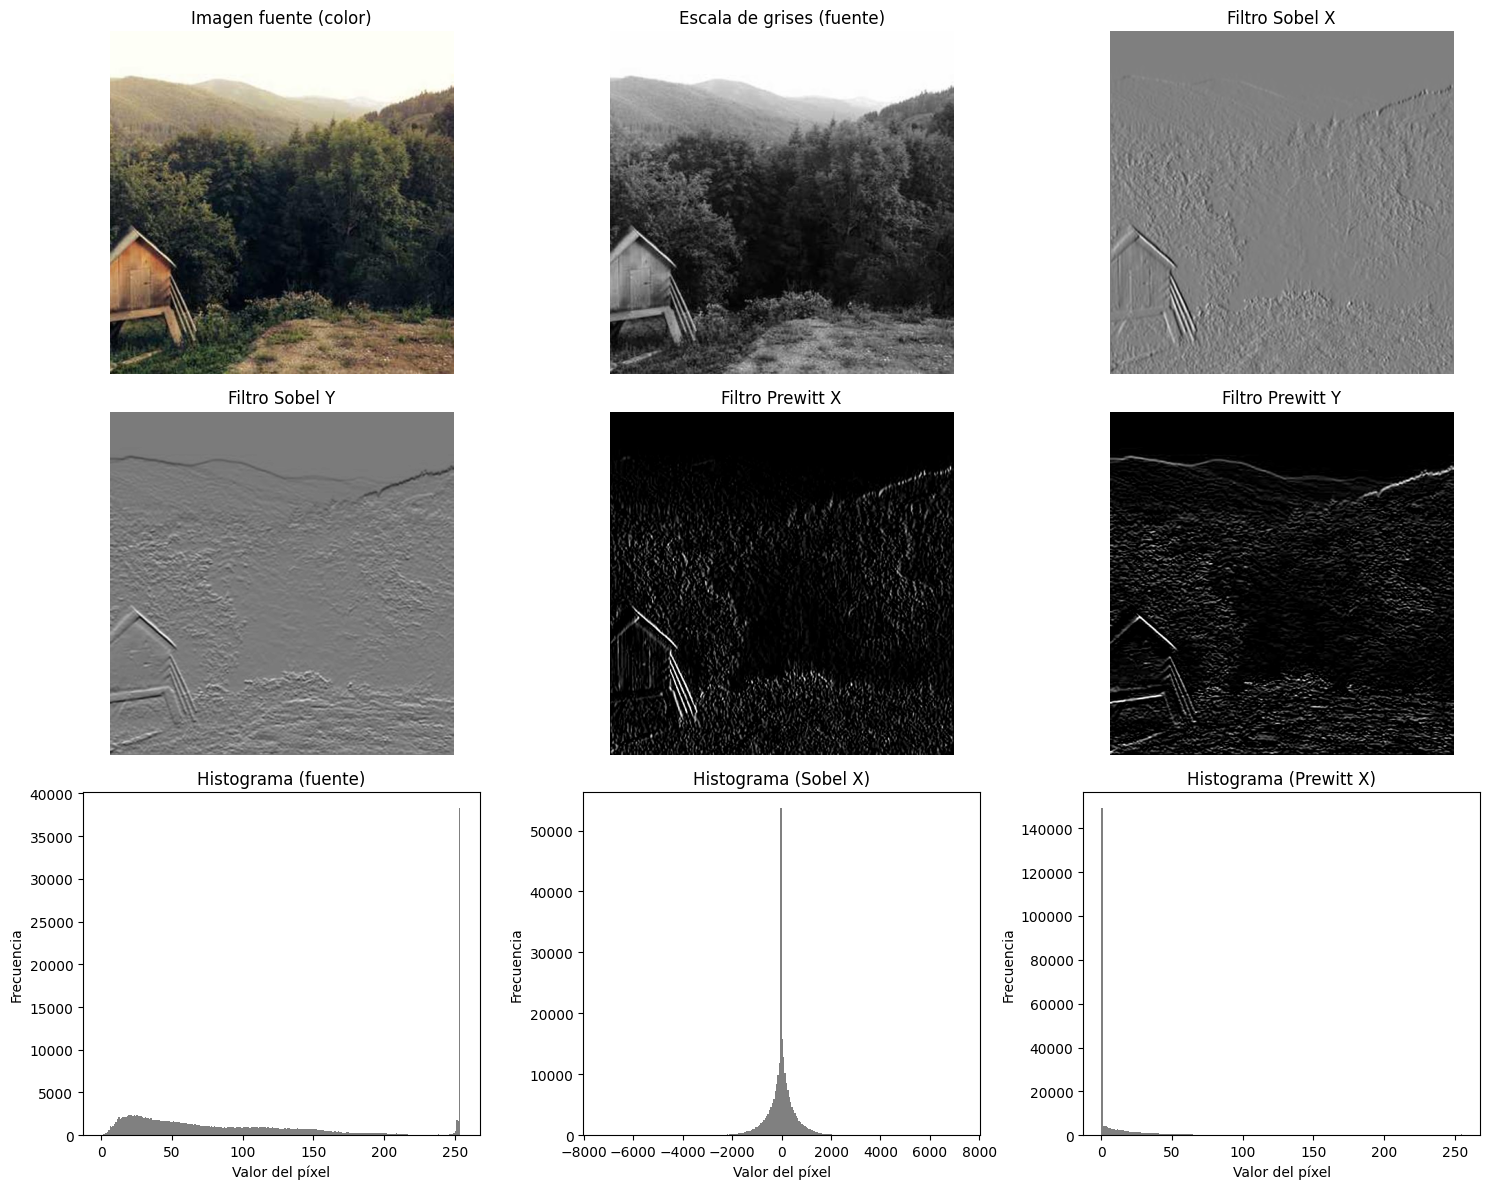

In [ ]:
#@title Filtro Sobel y Filtro Prewitt

import requests
from PIL import Image
from io import BytesIO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# URL de una imagen aleatoria de Lorem Picsum (puedes cambiar el tamaño)
url = "https://picsum.photos/500/500"
response = requests.get(url)

if response.status_code == 200:
    image = Image.open(BytesIO(response.content))

    color_image = np.array(image)
    gray_image = np.array(image.convert('L'))

    # Aplicar Filtro Sobel (Detectar bordes en dirección X y Y)
    sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)  # Sobel en dirección X
    sobely = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5)  # Sobel en dirección Y

    # Aplicar Filtro Prewitt
    prewitt_kernel_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=np.float32)
    prewitt_kernel_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=np.float32)
    prewittx = cv2.filter2D(gray_image, -1, prewitt_kernel_x)  # Prewitt en dirección X
    prewitty = cv2.filter2D(gray_image, -1, prewitt_kernel_y)  # Prewitt en dirección Y

    # Función para dibujar el histograma
    def plot_histogram(image, ax, title):
        ax.hist(image.ravel(), bins=256, color='gray')
        ax.set_title(title)
        ax.set_xlabel('Valor del píxel')
        ax.set_ylabel('Frecuencia')

    # Visualización de la imagen fuente, Sobel y Prewitt
    fig, axs = plt.subplots(3, 3, figsize=(15, 12))

    # Imagen fuente en color
    axs[0, 0].imshow(color_image)
    axs[0, 0].set_title("Imagen fuente (color)")
    axs[0, 0].axis('off')

    # Imagen fuente en escala de grises
    axs[0, 1].imshow(gray_image, cmap='gray')
    axs[0, 1].set_title("Escala de grises (fuente)")
    axs[0, 1].axis('off')

    # Filtro Sobel X
    axs[0, 2].imshow(sobelx, cmap='gray')
    axs[0, 2].set_title("Filtro Sobel X")
    axs[0, 2].axis('off')

    # Filtro Sobel Y
    axs[1, 0].imshow(sobely, cmap='gray')
    axs[1, 0].set_title("Filtro Sobel Y")
    axs[1, 0].axis('off')

    # Filtro Prewitt X
    axs[1, 1].imshow(prewittx, cmap='gray')
    axs[1, 1].set_title("Filtro Prewitt X")
    axs[1, 1].axis('off')

    # Filtro Prewitt Y
    axs[1, 2].imshow(prewitty, cmap='gray')
    axs[1, 2].set_title("Filtro Prewitt Y")
    axs[1, 2].axis('off')

    # Histogramas
    plot_histogram(gray_image, axs[2, 0], "Histograma (fuente)")
    plot_histogram(sobelx, axs[2, 1], "Histograma (Sobel X)")
    plot_histogram(prewittx, axs[2, 2], "Histograma (Prewitt X)")

    plt.tight_layout()
    plt.show()
else:
    print(f"Error al cargar la imagen {response.status_code}")

## Selección de caracteristicas:

* Erosión y Dilatación: Se aplican operaciones morfológicas de erosión y dilatación para suavizar y expandir características.
* Binarización con Otsu: Se binariza la imagen utilizando el método de Otsu, que ajusta automáticamente el umbral.
* Detección del Contorno Más Grande: Se aplica dilatación sobre la imagen binarizada, se detectan los contornos, y luego se resalta el contorno más grande en una máscara.


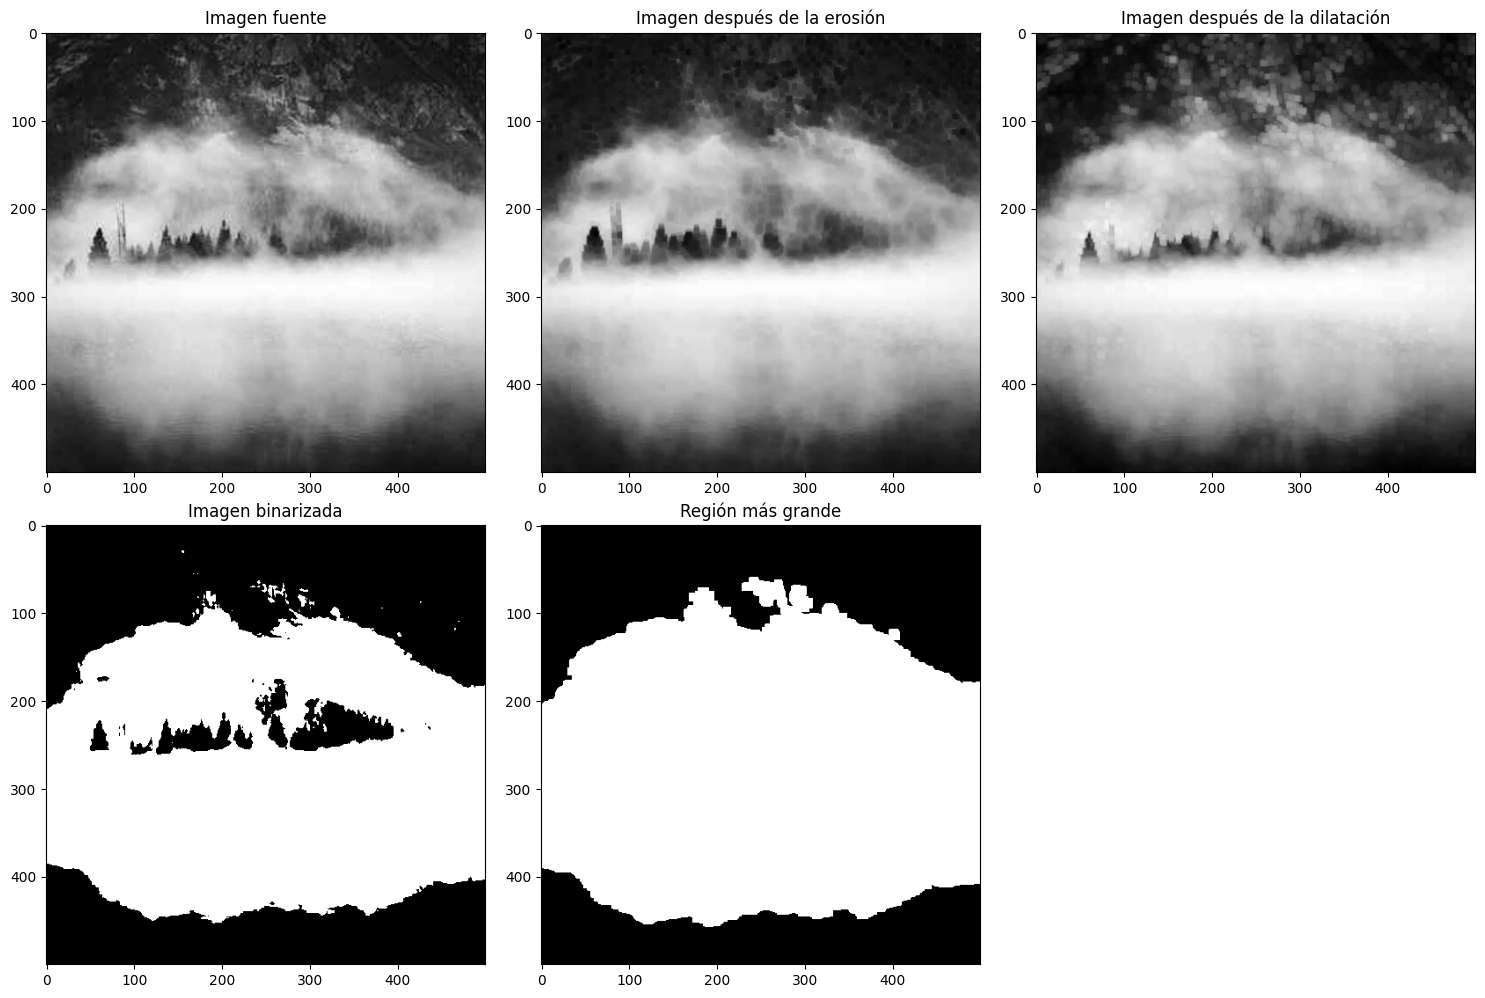

In [ ]:
import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

url = "https://picsum.photos/500/500"
response = requests.get(url)

if response.status_code == 200:
    # Convertir la imagen a un formato que pueda ser usado por OpenCV (BGR)
    image = Image.open(BytesIO(response.content)).convert('L')  # Convertir a escala de grises
    image = np.array(image)

    # Operación Morfológica: Erosión para suavizar pequeñas regiones
    kernel = np.ones((5, 5), np.uint8)  # Kernel de 5x5 para las operaciones morfológicas
    eroded_image = cv2.erode(image, kernel, iterations=1)

    # Dilatación para "expandir" características
    dilated_image = cv2.dilate(image, kernel, iterations=1)

    # Binarización con un umbral automático usando el método Otsu
    _, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Dilatación sobre la imagen binarizada para expandir las áreas
    dilated_binary_image = cv2.dilate(binary_image, kernel, iterations=2)

    # Encontrar contornos en la imagen binarizada
    contours, _ = cv2.findContours(dilated_binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Crear una máscara vacía para almacenar la región más grande
    largest_area_mask = np.zeros_like(image)

    # Encontrar el contorno con el área más grande y dibujarlo en la máscara
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        cv2.drawContours(largest_area_mask, [largest_contour], -1, 255, thickness=cv2.FILLED)

    # Mostrar la imagen fuente, después de erosión y dilatación, binarización y la región más grande
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Imagen fuente")

    plt.subplot(2, 3, 2)
    plt.imshow(eroded_image, cmap='gray')
    plt.title("Imagen después de la erosión")

    plt.subplot(2, 3, 3)
    plt.imshow(dilated_image, cmap='gray')
    plt.title("Imagen después de la dilatación")

    plt.subplot(2, 3, 4)
    plt.imshow(binary_image, cmap='gray')
    plt.title("Imagen binarizada")

    plt.subplot(2, 3, 5)
    plt.imshow(largest_area_mask, cmap='gray')
    plt.title("Región más grande")

    plt.tight_layout()
    plt.show()
else:
    print(f"Error al cargar la imagen {response.status_code}")

### Ajuste de Brillo, Contraste y Saturación en Imágenes

#### 1. Brillo
El brillo de una imagen se refiere a qué tan clara u oscura se ve la imagen. Aumentar el brillo hace que la imagen se vea más clara, mientras que disminuir el brillo hace que la imagen se vea más oscura.

- **Ajuste del brillo**: Para ajustar el brillo, se suma o resta un valor constante a todos los píxeles de la imagen. Un valor positivo aumenta el brillo, y un valor negativo lo disminuye.

#### 2. Contraste
El contraste de una imagen se refiere a la diferencia entre las áreas más claras y más oscuras de la imagen. Aumentar el contraste hace que las áreas claras sean más claras y las áreas oscuras más oscuras. Reducir el contraste hace que los colores de la imagen sean más uniformes.

- **Ajuste del contraste**: Para ajustar el contraste, se multiplica el valor de cada píxel por un factor. Un valor mayor que 1 aumenta el contraste, mientras que un valor entre 0 y 1 lo reduce.

#### 3. Saturación
La saturación de una imagen se refiere a la intensidad de los colores. Una mayor saturación hace que los colores sean más vívidos y brillantes, mientras que una menor saturación hace que los colores sean más apagados y cercanos al gris.

- **Ajuste de la saturación**: Para ajustar la saturación, se modifica el canal de saturación de la imagen en el espacio de color HSV. Aumentar el valor de saturación intensifica los colores, y disminuirlo los apaga.



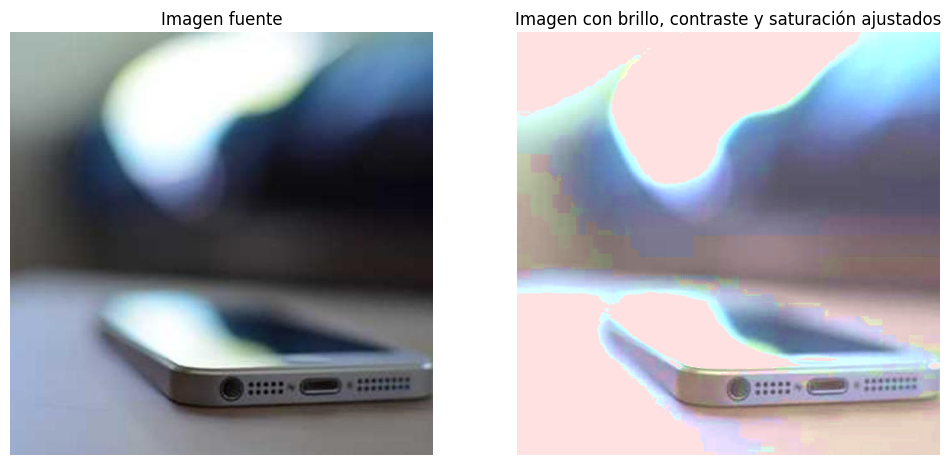

In [ ]:
import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# Función para ajustar brillo, contraste y saturación
def adjust_brightness_contrast_saturation(image, brightness=0, contrast=0, saturation=0):
    # Ajustar brillo
    if brightness != 0:
        image = cv2.convertScaleAbs(image, beta=brightness)

    # Ajustar contraste
    if contrast != 0:
        image = cv2.convertScaleAbs(image, alpha=contrast)

    # Ajustar saturación
    if len(image.shape) == 3:  # Verificar si la imagen es a color
        hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        h, s, v = cv2.split(hsv)
        s = cv2.add(s, saturation)
        s = np.clip(s, 0, 255)
        hsv = cv2.merge([h, s, v])
        image = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

    return image

# URL de una imagen aleatoria de Lorem Picsum (puedes cambiar el tamaño)
url = "https://picsum.photos/500/500"
response = requests.get(url)

if response.status_code == 200:
    # Convertir la imagen a un formato que pueda ser usado por OpenCV
    image = Image.open(BytesIO(response.content))
    image = np.array(image)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Convertir la imagen de PIL a formato OpenCV (BGR)

    # Ajustar brillo, contraste y saturación
    brightness = 70  # Cambia este valor entre -255 y 255
    contrast = 1.2   # Cambia este valor (mayor que 1 aumenta el contraste, entre 0 y 1 lo reduce)
    saturation = 30  # Cambia este valor entre -255 y 255
    adjusted_image = adjust_brightness_contrast_saturation(image, brightness, contrast, saturation)

    # Mostrar la imagen fuente y la imagen ajustada
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convertir a RGB para mostrar correctamente con Matplotlib
    plt.title('Imagen fuente')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(adjusted_image, cv2.COLOR_BGR2RGB))  # Convertir a RGB para mostrar correctamente con Matplotlib
    plt.title('Imagen con brillo, contraste y saturación ajustados')
    plt.axis('off')

    plt.show()
else:
    print(f"Error al cargar la imagen {response.status_code}")

# 3: Aumentación de datos


# Transformaciones de aumentación de datos

La augmentación de datos es una técnica utilizada en el procesamiento de imágenes y en el entrenamiento de modelos de aprendizaje automático para aumentar la diversidad de los datos de entrenamiento sin recolectar nuevas imágenes. Esto se logra aplicando varias transformaciones a las imágenes existentes. A continuación se describen las transformaciones aplicadas en el código:

## 1. Rotación
- **Rotación 10 grados**: La imagen se rota 10 grados en sentido horario.
- **Rotación -10 grados**: La imagen se rota 10 grados en sentido antihorario.

La rotación ayuda a que el modelo sea invariante a la orientación de los objetos en las imágenes.

## 2. Traslación
- **Traslación 10 píxeles**: La imagen se desplaza 10 píxeles hacia la derecha y 10 píxeles hacia abajo.
- **Traslación -10 píxeles**: La imagen se desplaza 10 píxeles hacia la izquierda y 10 píxeles hacia arriba.

La traslación asegura que el modelo pueda reconocer objetos independientemente de su posición en la imagen.

## 3. Escalado
- **Escalado 1.1x**: La imagen se amplía en un 10%.
- **Escalado 0.9x**: La imagen se reduce en un 10%.

El escalado permite que el modelo aprenda a identificar objetos en diferentes tamaños.

## 4. Flip
- **Flip horizontal**: La imagen se voltea horizontalmente.
- **Flip vertical**: La imagen se voltea verticalmente.

El flip ayuda al modelo a ser invariante a las reflexiones horizontales y verticales de los objetos.



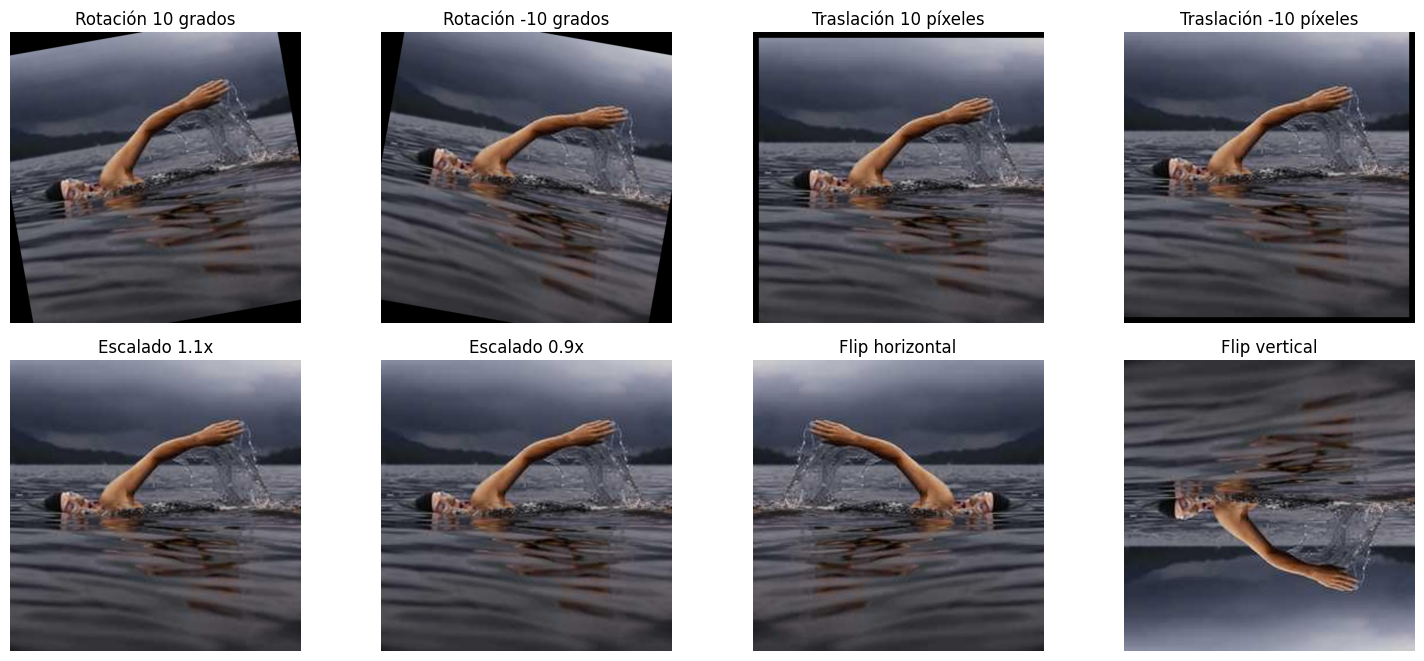

In [ ]:
import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# Función para aplicar data augmentation
def augment_image(image):
    augmented_images = []
    transformations = []

    # Rotación
    rows, cols = image.shape[:2]
    M = cv2.getRotationMatrix2D((cols/2, rows/2), 10, 1)
    rotated = cv2.warpAffine(image, M, (cols, rows))
    augmented_images.append(rotated)
    transformations.append("Rotación 10 grados")

    M = cv2.getRotationMatrix2D((cols/2, rows/2), -10, 1)
    rotated = cv2.warpAffine(image, M, (cols, rows))
    augmented_images.append(rotated)
    transformations.append("Rotación -10 grados")

    # Traslación
    M = np.float32([[1, 0, 10], [0, 1, 10]])
    translated = cv2.warpAffine(image, M, (cols, rows))
    augmented_images.append(translated)
    transformations.append("Traslación 10 píxeles")

    M = np.float32([[1, 0, -10], [0, 1, -10]])
    translated = cv2.warpAffine(image, M, (cols, rows))
    augmented_images.append(translated)
    transformations.append("Traslación -10 píxeles")

    # Escalado
    scaled_up = cv2.resize(image, None, fx=1.1, fy=1.1, interpolation=cv2.INTER_LINEAR)
    scaled_down = cv2.resize(image, None, fx=0.9, fy=0.9, interpolation=cv2.INTER_LINEAR)
    augmented_images.append(scaled_up)
    transformations.append("Escalado 1.1x")
    augmented_images.append(scaled_down)
    transformations.append("Escalado 0.9x")

    # Flip Horizontal y Vertical
    flip_horizontal = cv2.flip(image, 1)
    flip_vertical = cv2.flip(image, 0)
    augmented_images.append(flip_horizontal)
    transformations.append("Flip horizontal")
    augmented_images.append(flip_vertical)
    transformations.append("Flip vertical")

    return augmented_images, transformations

# URL de una imagen aleatoria de Lorem Picsum (puedes cambiar el tamaño)
url = "https://picsum.photos/500/500"
response = requests.get(url)

if response.status_code == 200:
    # Convertir la imagen a un formato que pueda ser usado por OpenCV
    image = Image.open(BytesIO(response.content))
    image = np.array(image)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Convertir la imagen de PIL a formato OpenCV (BGR)

    # Aplicar data augmentation
    augmented_images, transformations = augment_image(image)

    # Mostrar las imágenes aumentadas con títulos claros
    plt.figure(figsize=(15, 10))
    for i, img in enumerate(augmented_images):
        plt.subplot(3, 4, i+1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convertir a RGB para mostrar correctamente
        plt.title(transformations[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print(f"Error al cargar la imagen {response.status_code}")

## Ejercicio: Aplicar filtros y transformaciones a imágenes del Open Images Dataset
1) Accedan al Open Images Dataset:
https://storage.googleapis.com/openimages/web/visualizer/index.html

2) Descargar al menos una imagen y luego aplica las algunas de las técnicas:
* Filtros de suavizado.
* Filtros de detección de bordes.
* Transformaciones geométricas: rotación, traslación, escalado, flip.
* Ajustes de Brillo, Contraste y Saturación.

3) Crear al menos 50 variaciones de la imgen selecionada, aplicando minimo 3 técnica del item anterior

Visualiza los resultados: Compara la imagen original con las imágenes filtradas y transformadas.